In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, MaxPool2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# train_images = np.load('drive/MyDrive/Colab Notebooks/train_images_200.npy')
# train_labels = np.load('drive/MyDrive/Colab Notebooks/train_labels_200.npy')
# test_images5 = np.load('drive/MyDrive/Colab Notebooks/test_images_change5.npy')
# test_labels5 = np.load('drive/MyDrive/Colab Notebooks/test_labels_change5.npy')
# test_images3 = np.load('drive/MyDrive/Colab Notebooks/test_images_change3.npy')
# test_labels3 = np.load('drive/MyDrive/Colab Notebooks/test_labels_change3.npy')

In [3]:
test_images = np.load('drive/MyDrive/Colab Notebooks/test_images_200.npy')
test_labels = np.load('drive/MyDrive/Colab Notebooks/test_labels_200.npy')
test_images = np.array(test_images).reshape(-1, 96, 96, 3) / 255.0
test_labels_one_hot = np.eye(2)[test_labels]

In [ ]:
from sklearn.model_selection import train_test_split

# train_images = np.array(train_images).reshape(-1, 96, 96, 3) / 255.0
# test_images5 = np.array(test_images5).reshape(-1, 96, 96, 3) / 255.0
# test_images3 = np.array(test_images3).reshape(-1, 96, 96, 3) / 255.0

# train_labels_one_hot = np.eye(2)[train_labels]
# test_labels_one_hot5 = np.eye(2)[test_labels5]
# test_labels_one_hot3 = np.eye(2)[test_labels3]

In [4]:
from keras.models import load_model

model5 = load_model('drive/MyDrive/Colab Notebooks/change5_5472.h5')
model3 = load_model('drive/MyDrive/Colab Notebooks/change3_5247.h5')

In [5]:
test_loss, test_acc = model3.evaluate(test_images, test_labels_one_hot, verbose=2)
test_loss, test_acc = model5.evaluate(test_images, test_labels_one_hot, verbose=2)

313/313 - 14s - loss: 0.7018 - acc: 0.5080 - 14s/epoch - 44ms/step
313/313 - 5s - loss: 0.7770 - acc: 0.5162 - 5s/epoch - 17ms/step


In [9]:
# 테스트 데이터셋에 대한 예측 생성
pred_probs3 = model3.predict(test_images)
pred_probs5 = model5.predict(test_images)

313/313 [==============================] - 5s 16ms/step


In [10]:
# 한 모델만 실험

selected_images = []
selected_labels = []

for i in range(len(test_images)):
    if any(0.815 >= p >= 0.662 for p in pred_probs3[i]):
        selected_images.append(test_images[i])
        selected_labels.append(test_labels_one_hot[i])

selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

print(len(selected_images))
print(sum(selected_labels))

560
[276. 284.]


In [11]:
# 두 모델이 예측한 라벨값이 다르든 같든

selected_images = []
selected_labels = []

for i in range(len(test_images)):
    if any(0.815 >= p >= 0.662 for p in pred_probs3[i]) and any(0.815 >= p >= 0.662 for p in pred_probs5[i]):
        selected_images.append(test_images[i])
        selected_labels.append(test_labels_one_hot[i])

selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

print(len(selected_images))
print(sum(selected_labels))

160
[73. 87.]


In [ ]:
# 두 모델 같은 라벨이 정답이라고 했을때

selected_images = []
selected_labels = []

for i in range(len(test_images)):
    pred_probs5_max_idx = np.argmax(pred_probs5[i])
    pred_probs3_max_idx = np.argmax(pred_probs3[i])

    if pred_probs5_max_idx == pred_probs3_max_idx and 0.815 >= pred_probs5[i][pred_probs5_max_idx] >= 0.662 and 0.815 >= pred_probs3[i][pred_probs3_max_idx] >= 0.662:
        selected_images.append(test_images[i])
        selected_labels.append(test_labels_one_hot[i])

selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

print(len(selected_images))

149


In [12]:
test_loss, test_acc = model5.evaluate(selected_images, selected_labels, verbose=2)
test_loss, test_acc = model3.evaluate(selected_images, selected_labels, verbose=2)

5/5 - 0s - loss: 0.7249 - acc: 0.5875 - 146ms/epoch - 29ms/step
5/5 - 0s - loss: 0.6722 - acc: 0.6438 - 132ms/epoch - 26ms/step


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 검증 데이터에 대한 예측 값 얻기
y_pred = model3.predict(selected_images)

# 예측 결과를 이진 형태로 변환 (임계값을 0.5로 설정)
y_pred_classes = (y_pred > 0.5).astype(int)[:, 0]
selected_labels_indices = selected_labels.astype(int)[:, 0]

# Confusion matrix 얻기
tn, fp, fn, tp = confusion_matrix(selected_labels_indices, y_pred_classes).ravel()

# 정밀도
precision = tp / (tp + fp)
print("Precision: ", precision)

# 재현율 (Recall, Sensitivity, True Positive Rate, TPR) 계산
recall = tp / (tp + fn)
print("Recall: ", recall)

# 특이도 (Specificity, True Negative Rate, TNR) 계산
specificity = tn / (tn + fp)
print("Specificity: ", specificity)

# 위양성율 (False Positive Rate, FPR) 계산
false_positive_rate = fp / (fp + tn)
print("False Positive Rate: ", false_positive_rate)

# 위음성율 (False Negative Rate, FNR) 계산
false_negative_rate = fn / (fn + tp)
print("False Negative Rate: ", false_negative_rate)

f1 = 2 * precision * recall / (precision + recall)
print("F1-score : ", report["weighted avg"]["f1-score"])

5/5 [==============================] - 0s 22ms/step
Precision:  0.6379310344827587
Recall:  0.5068493150684932
Specificity:  0.7586206896551724
False Positive Rate:  0.2413793103448276
False Negative Rate:  0.4931506849315068
F1-score :  0.6374909123954925


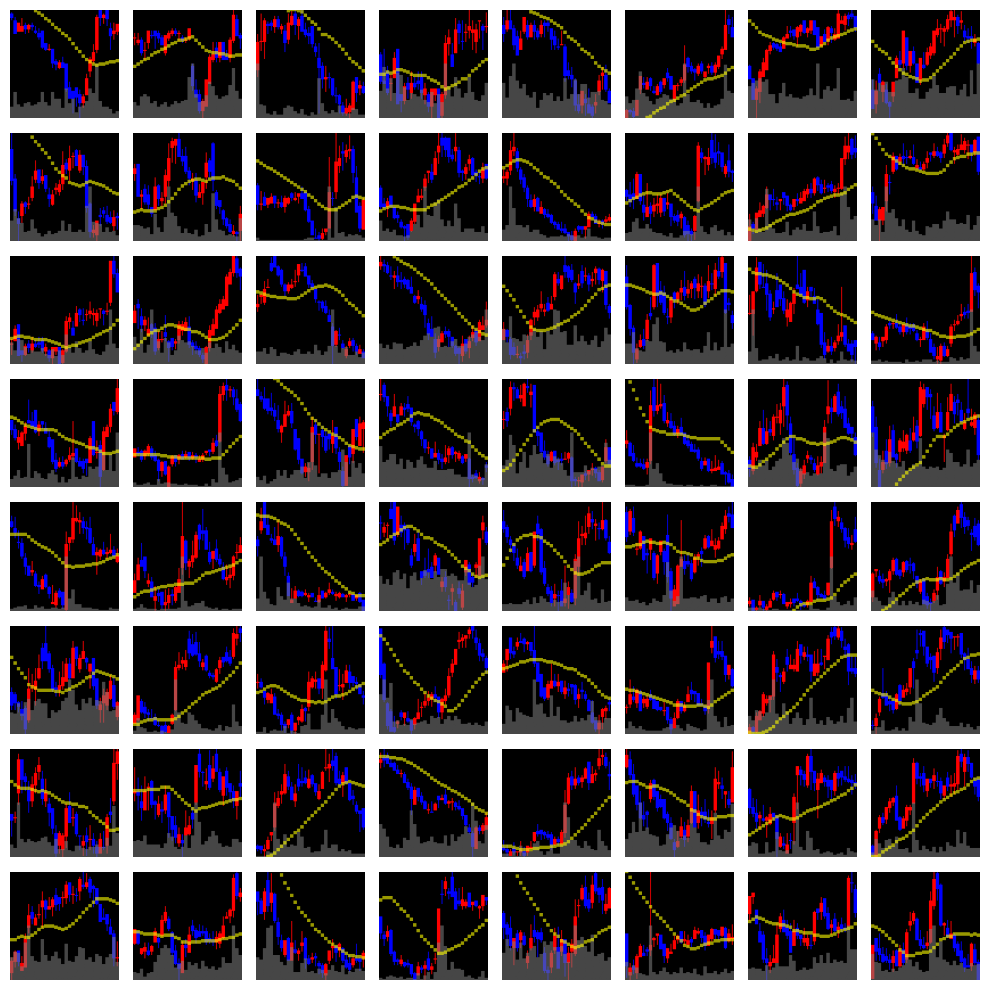

In [ ]:
import matplotlib.pyplot as plt

# 진실된 레이블이 0인 인덱스 찾기
label_zero_indices = [i for i, label in enumerate(selected_labels_indices) if label == 0]

# 레이블이 0인 이미지 선택
label_zero_images = [selected_images[i] for i in label_zero_indices]

# 이미지 출력 함수
def display_images(images, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    axes = axes.ravel()

    for i in range(rows * cols):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# 이미지 출력
num_examples = min(len(label_zero_images), 73)
rows = cols = int(np.sqrt(num_examples))
display_images(label_zero_images[:num_examples], rows, cols)


### Precision (정밀도) : 0.6429

모델이 참(True)이라고 예측한 것 중 실제로 참(True)인 비율이 약 64.29%입니다. 즉, 모델이 참이라고 예측한 결과 중에서 약 64.29%만 실제로 참인 것입니다.

<br>

### Recall (재현율, 민감도) : 0.5068

실제 참(True)인 것 중에서 모델이 참(True)로 예측한 것의 비율이 약 50.68%입니다. 즉, 모델이 전체 참인 데이터 중 약 절반만 참이라고 예측했다고 볼 수 있습니다.

<br>

### Specificity (특이도) : 0.7586

실제 거짓(False)인 것 중에서 모델이 거짓(False)로 예측한 것의 비율이 약 75.86%입니다. 즉, 전체 거짓 데이터 중 약 75.86%를 올바르게 거짓이라고 예측했습니다.

<br>

### False Positive Rate (위양성율) : 0.2414

실제 거짓(False)인 것 중에서 모델이 참(True)으로 잘못 예측한 것의 비율이 약 24.14%입니다. 이 비율은 모델이 거짓인 경우를 참이라고 잘못 예측한 비율을 나타냅니다.

<br>

### False Negative Rate (위음성율) : 0.4932
실제 참(True)인 것 중에서 모델이 거짓(False)으로 잘못 예측한 것의 비율이 약 49.32%입니다. 즉, 모델이 참인 경우를 거짓이라고 잘못 예측한 비율이 상당히 높습니다.

<br>

### F1-score (F1 점수) : 0.6375

정밀도와 재현율의 조화 평균인 F1 점수는 약 0.6375로, 모델의 성능을 종합적으로 평가하는 데 사용되는 값입니다.

<br>

종합적으로 이 모델의 성능은 완벽하진 않다고 볼 수 있습니다. 특히, 재현율이 낮음으로 인해 실제 참인 경우들 중에서도 거짓이라고 잘못 예측하는 경우가 많다는 것을 알 수 있습니다. 이를 줄이기 위해 모델을 튜닝하거나 데이터를 더 잘 정제하여 성능을 개선해야 할 수 있습니다.

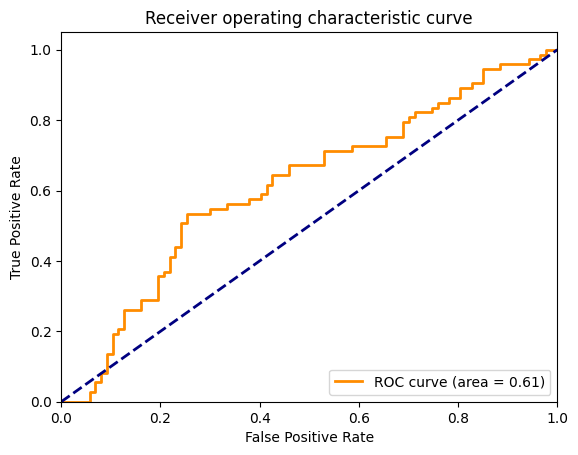

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(selected_labels_indices, y_pred[:, 0])

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브를 그립니다.
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()


**ROC(Receiver Operating Characteristic) 커브**는 이진 분류 모델의 성능을 평가하는 데 사용되는 그래프입니다.

ROC 커브는 가로축에 거짓 양성률(False Positive Rate, FPR)과 세로축에 참 양성률(True Positive Rate, TPR)을 놓고 그립니다. TPR은 재현율, 민감도(Sensitivity)와 동일한 개념이며, FPR은 1에서 특이도(Specificity, True Negative Rate, TNR)를 뺀 값입니다. ROC 커브는 모델의 임계값을 변경하며, 해당 임계값에 대한 TPR과 FPR의 변화를 시각적으로 표시합니다. 이를 통해 분류 모델의 성능을 평가하고, 최적의 임계값을 선택할 수 있습니다.

ROC 커브의 대각선은 무작위로 예측한 경우의 성능을 의미합니다. 이 선보다 위쪽에 위치한 곡선은 무작위 예측보다 성능이 좋은 것으로 간주할 수 있습니다. 곡선이 왼쪽 위 모서리에 가까울수록, 모델의 성능이 좋다고 판단할 수 있습니다.

ROC 커브는 AUC(Area Under Curve)라는 값을 이용하여 모델의 성능 수치적으로 평가하기도 합니다. AUC는 ROC 커브 아래의 영역을 의미하며 값이 클수록 분류 성능이 좋다고 판단합니다. AUC 값이 1에 가까울수록 완벽한 분류 성능을 가진 것으로 간주되며, 0.5에 가까우면 무작위 예측 수준의 성능을 가진 것으로 간주됩니다.